### Digit to Image
_What if we give a neural network a single digit for it to generate its image?_

In [2]:
import torch
import torchvision
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
device = torch.device('cuda')

In [4]:
data = torchvision.datasets.MNIST(
    root = "mnist/",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

In [5]:
image, label = data[0]
print("Dimention of a single image:", image.shape)
print("Sample label:", label)

Dimention of a single image: torch.Size([1, 28, 28])
Sample label: 5


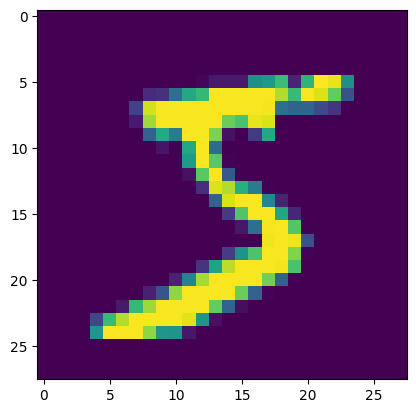

In [6]:
plt.imshow(image[0])
plt.show()

In [8]:
inputs = data.targets # X: integers
targets = data.data.reshape(60000, 28*28) # Y: image matrices

inputs.shape, targets.shape

(torch.Size([60000]), torch.Size([60000, 784]))

In [11]:
targets = targets.float() / targets[0].max()

In [12]:
class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(10, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 28*28),
        )
    def forward(self, x):
        logits = self.linear(x)
        return logits

d2i = NN().to(device)

In [13]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(d2i.parameters(), lr = 0.001)

In [14]:
def one_hot_encode(labels, num_classes = 10):
    return torch.nn.functional.one_hot(labels, num_classes = num_classes).float()

In [15]:
batch_size = 64
epochs = 5
num_samples = 60000

for epoch in range(epochs):

    for i in range(0, num_samples, batch_size):

        x_batch = inputs[i:i + batch_size]
        x_batch = one_hot_encode(x_batch).to(device)
        y_batch = targets[i:i + batch_size].to(device)

        logits = d2i(x_batch)
        loss = criterion(logits, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f"Epoch [{epoch + 1} / {epochs}], Loss: {loss.item():.4f}")

Epoch [1 / 5], Loss: 0.2272
Epoch [2 / 5], Loss: 0.2243
Epoch [3 / 5], Loss: 0.2238
Epoch [4 / 5], Loss: 0.2232
Epoch [5 / 5], Loss: 0.2233


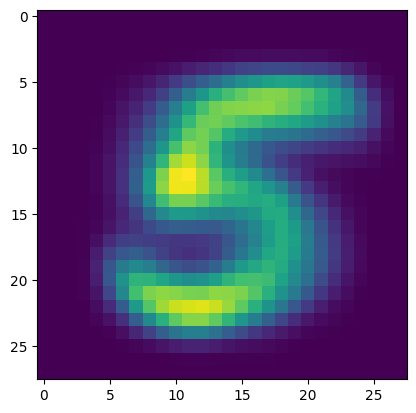

In [16]:
digit = one_hot_encode(torch.tensor([5])).to(device)

with torch.no_grad():
    logits = d2i(digit)
    target = torch.sigmoid(logits).view(28, 28).cpu()

plt.imshow(target)
plt.show()